In [1]:
Q0 = 100
c0 = 1
life_years = 40
build_years = 3
Ibar = -15
r = 0.05
pi0 = 3

Qmax = 200
Q_intuitivo = 200
Q_values = collect(0:200);


##### Questão 4 - Item A

In [2]:
# import Pkg
# Pkg.add("NPFinancial")
using NPFinancial

I = Ibar * Q_intuitivo
c = 0.01 * Q_intuitivo^2
profit_f0 = (pi0- c0)*Q0
profit_f1 = pi0 * Q_intuitivo - c

f0_flow = fill(profit_f0, build_years+life_years)
f1_flow =[fill(I,build_years); fill(profit_f1,life_years)]
agg_flow = f0_flow.+f1_flow

agg_npv = npv(r,agg_flow)

######### PRINT RESULTS #########
println("Agg Factory NPV: \$", round(agg_npv, digits=2))
if agg_npv < 0
    println("NEGATIVE NPV - NON OPTIMAL DECISION (Q=", Q_intuitivo, ")")
else
    println("POSITIVE NPV - OPTIMAL DECISION (Q=", Q_intuitivo, ")")
end

Agg Factory NPV: $-1780.83
NEGATIVE NPV - NON OPTIMAL DECISION (Q=200)


##### Questão 4 - Item C

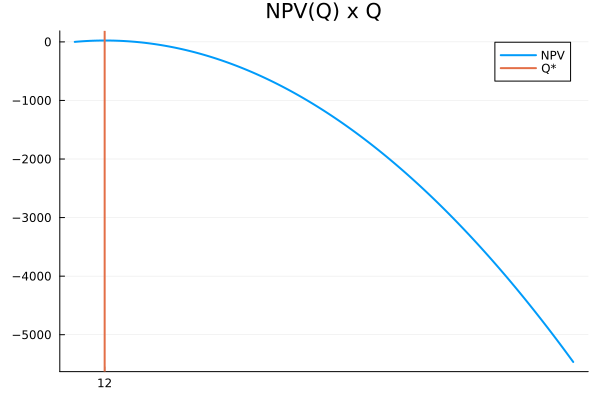

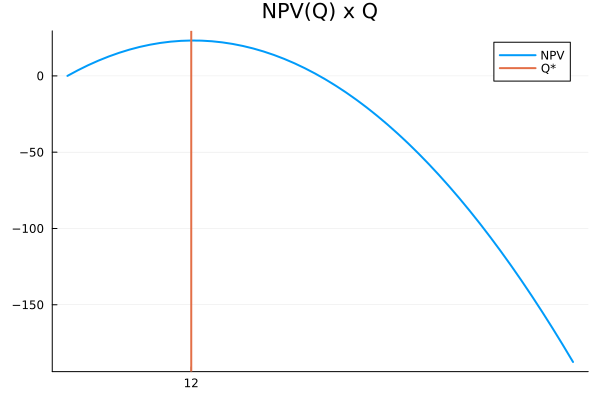

In [3]:
npv_values = []

for q in Q_values
    i = -15 * q ; k = 0.01 * q^2 ; p = pi0*q - k
    flow =[fill(i,build_years); fill(p,life_years)]
    agg_npv = npv(r,flow)
    append!(npv_values, round(agg_npv, digits=2))
end

max_npv, max_Q = findmax(npv_values)

####### Plot Results #######
using Plots
p1 = plot(Q_values, npv_values, title = "NPV(Q) x Q", label="NPV", linewidth=2)
p2 = plot(Q_values[1:50], npv_values[1:50], title = "NPV(Q) x Q", label="NPV", linewidth=2)
plot!(p1,[Q_values[max_Q]], seriestype="vline", linewidth=2, xticks=[Q_values[max_Q]], label="Q*")
plot!(p2,[Q_values[max_Q]], seriestype="vline", linewidth=2, xticks=[Q_values[max_Q]], label="Q*")

display(p1)
display(p2)


##### Questão 4 - Item D

In [34]:
# q = Q_values[max_Q] #12
# i = Ibar * q ; k = 0.01 * q^2 ; p = pi0*q - k
# flow =[fill(i,build_years); fill(p,life_years)]

# payback = Inf
# for idx in 1:length(flow)
#     sm = sum(flow[1:idx])
#     if sm >= 0
#         payback = idx - 1 # julia starts on idx 1 and question period in idx 0, so this adjustment is needed
#         break
#     end
# end

# ########## Print Results ##########
# if isfinite(payback)
#     println("PAYBACK(Q=", q, ") = ", payback)
# else
#     println("PAYBACK(Q=", q, ") DOES NOT EXISTS")
# end

q = Q_values[max_Q] #12
i = Ibar * q ; k = 0.01 * q^2 ; p = pi0*q - k
payback_period = 0
cumulative_cash_flow = 0.0
# Calculate discounted cash flows and accumulate them until the cumulative cash flow becomes positive
for t in 1: (build_years + life_years - 1)
    if t <= (build_years - 1)
        discounted_cash_flow = i / (1 + r)^t
    else
        discounted_cash_flow = p / (1 + r)^t
    end

    cumulative_cash_flow += discounted_cash_flow
    if cumulative_cash_flow + i >= 0
        payback_period = t
        break
    end
end

# Print the payback period
if payback_period > 0
    println("Payback period: Year ", payback_period)
else
    println("Payback period not reached within the analysis horizon.")
end

# Plot the present value until year t
present_value = zeros(build_years+life_years)
for t in 0:(build_years+life_years-1)
    if t <= (build_years - 1)
        present_value[t+1] = sum(i / (1 + r)^j for j in 0:t)
    else
        present_value[t+1] = sum(i / (1 + r)^j for j in 0:(build_years-1)) + sum(p / (1 + r)^j for j in build_years:t)
    end
end

p1 = plot(0:(build_years+life_years-1), present_value, xlabel="Year", ylabel="Present Value",
     title="Present Value until Year t", label = "Present value")
plot!(p1, [payback_period], seriestype="vline", label="Payback period (t =$payback_period)")
display(p1)


Payback period: Year 38


##### Questão 4 - Item F

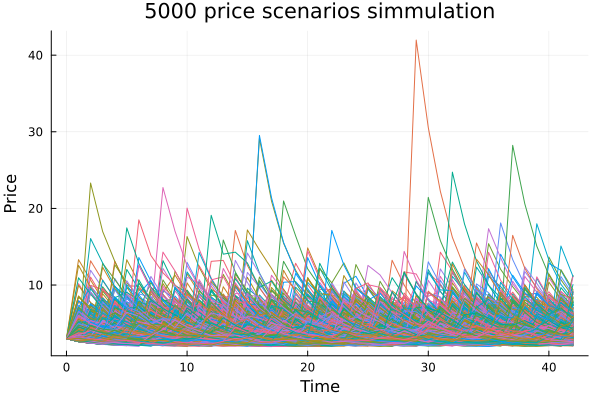

In [26]:
using Distributions
using Plots

μ = -1.2
σ = 1.0
α = 0.7
β = 0.5
n_paths = 5000
periods = build_years + life_years

dist_err = LogNormal(μ, σ)

prices = zeros(n_paths, periods)
prices[:, 1] .= pi0

for i in 1:n_paths
    for t in 2:periods
        prices[i, t] = β + α * prices[i, t-1] + rand(dist_err)
    end
end

plot(collect(0:periods-1), prices', legend=false, xlabel="Time", ylabel="Price",
     title="5000 price scenarios simmulation")


##### Questão 4 - Item G

In [28]:
P = ones(n_paths) / n_paths
opt_cap = []

for q in 0:Qmax
    build_flow = sum(Ibar * q / (1 + r)^t for t in 0:(build_years - 1))
    prod_flow = sum(P[i] * sum((prices[i, t] * q - 0.01 * q^2)/ (1 + r)^t for t in build_years:(life_years - 1)) for i in 1:n_paths)
    append!(opt_cap, build_flow + prod_flow)
end

max_VP, max_idx = findmax(opt_cap)
Q_optimal = max_idx - 1

# Print the optimal production quantity
println("Optimal production quantity (Q*): ", Q_optimal)
println("Expected PV for Optimal production quantity (Q*): ", max_VP)

println(opt_cap)


Optimal production quantity (Q*): 27
Expected PV for Optimal production quantity (Q*): 114.957307877723
Any[0.0, 8.304265327630098, 16.297254712330897, 23.978968154101352, 31.349405652942835, 38.40856720885469, 45.15645282183681, 51.59306249189035, 57.71839621901262, 63.53245400320492, 69.03523584446975, 74.22674174280507, 79.10697169820787, 83.67592571068201, 87.93360378022805, 91.88000590684192, 95.51513209052985, 98.83898233128627, 101.85155662911427, 104.55285498401054, 106.94287739598053, 109.02162386501709, 110.78909439112772, 112.24528897430321, 113.39020761455458, 114.22385031187105, 114.74621706626499, 114.957307877723, 114.85712274625644, 114.44566167185394, 113.72292465452415, 112.6889116942707, 111.34362279108109, 109.68705794496873, 107.71921715591611, 105.4401004239403, 102.849707749034, 99.94803913120222, 96.7350945704336, 93.21087406674019, 89.3753776201172, 85.22860523055806, 80.7705568980798, 76.00123262266538, 70.92063240432844, 65.52875624305807, 59.825604138851304,

##### Questão 4 - Item H

In [39]:
PV_neg_Q_optimal = sum(sum(Ibar * Q_optimal / (1 + r)^t for t in 0:2) + sum((prices[i, t] * Q_optimal - 0.01 * Q_optimal^2) / (1 + r)^t for t in 3:42) < 0 for i in 1:n_paths) / n_paths

PV_neg_Q_intuitivo = sum(sum(Ibar * Q_intuitivo / (1 + r)^t for t in 0:2) + sum((prices[i, t] * Q_intuitivo - 0.01 * Q_intuitivo^2) / (1 + r)^t for t in 3:42) < 0 for i in 1:n_paths) / n_paths

println("Negative PV probability for the optimal expansion under uncertainty  Q* = $Q_optimal: ", PV_neg_Q_optimal)
println("Negative PV probability for Q_intuitivo = $Q_intuitivo: ", PV_neg_Q_intuitivo)

Negative PV probability for the optimal expansion under uncertainty  Q* = 27: 0.2316
Negative PV probability for Q_intuitivo = 200: 0.9956


##### Questão 4 - Item I

In [68]:
I = Ibar * Q_optimal
payback_period = 0
cumulative_cash_flow = 0.0

# Calculate discounted cash flows and accumulate them until the cumulative cash flow becomes positive
for t in 1: (build_years + life_years - 1)
    if t <= (build_years - 1)
        discounted_cash_flow = I / (1 + r)^t
    else
        discounted_cash_flow = (Q_optimal * prices[:, t] .- 0.01 * Q_optimal^2) / (1 + r)^t
    end

    cumulative_cash_flow += sum(discounted_cash_flow)
    if cumulative_cash_flow >= -I
        payback_period = t
        break
    end
end

# Print the payback period
if payback_period > 0
    println("Payback period: Year ", payback_period)
else
    println("Payback period not reached within the analysis horizon.")
end

# Plot the present value until year t
present_value = zeros(build_years+life_years-1)
for t in 1:(build_years+life_years-1)
    present_value[t] = sum(Q_optimal * prices[:, i] / (1 + r)^i for i in 1:t)
end

plot(1:(build_years+life_years-1), present_value, xlabel="Year", ylabel="Present Value",
     title="Present Value until Year t")


Payback period: Year 3


MethodError: MethodError: Cannot `convert` an object of type Vector{Float64} to an object of type Float64
Closest candidates are:
  convert(::Type{T}, !Matched::Gray24) where T<:Real at C:\Users\mmeir\.julia\packages\ColorTypes\1dGw6\src\conversions.jl:114
  convert(::Type{T}, !Matched::Gray) where T<:Real at C:\Users\mmeir\.julia\packages\ColorTypes\1dGw6\src\conversions.jl:113
  convert(::Type{T}, !Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:273
  ...